In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import numpy as np

In [5]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [6]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [8]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
print(X_train_2classes.shape)
# print(Y_train_2classes)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

(11686, 784)


In [9]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [11]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_2classes, Y_train_2classes, test_size=0.001, random_state=42)

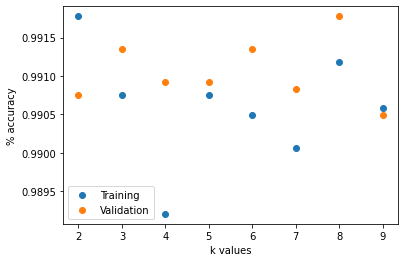

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
clf = Perceptron(tol=1e-3, random_state=0)
X=X_train
y=y_train
X2=X_test_2classes
Y2=Y_test_2classes
result=[]
X_train=[]
X_test=[]
y_train=[]
y_test=[]
for i in range(2,10):
  clf = Perceptron(tol=1e-3, random_state=0)
  scores = cross_val_score(clf, X, y, cv=i)
  kf = KFold(n_splits=i)
  kf.get_n_splits(X)
  temp=[]
  accuracy=[]
  valaccuracy=[]
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    accuracy.append(calc_accuracy(X_train,X_test,y_train,y_test))
  accuracy=np.array(accuracy)
  result.append([scores.mean(),accuracy.mean(),i])
  
# print(result)
x=[]
y=[]
z=[]
for a,b,c in result:
  x.append(c)
  y.append(a)
  z.append(b)

plt.scatter(x,y,label='Training')
plt.legend()
plt.xlabel("k values")
plt.ylabel("% accuracy")
plt.scatter(x,z,label='Validation')
plt.legend()